#### Introduction
Large language models (LLMs) have demonstrated remarkable capabilities across many language tasks, even ones challenging for native speakers, such as translation. However, to properly assess these models' abilities, we need standardized evaluation methods.
While basic language competency - producing coherent, grammatically correct text across languages - has largely been mastered by state-of-the-art LLMs, more nuanced aspects of language understanding remain challenging. One such frontier is the comprehension of metaphorical expressions, idioms, and figures of speech.

Consider the Danish expression *"stå med håret i postkassen"*. Literally, it means "stand with your hair in the mailbox". And that's neither telling nor helpful. But its actual meaning is "to be in a problematic situation where one feels powerless, possibly as a result of being disappointed, betrayed, or deceived." Its most closely-related English counterpart would be an idiom like *"being caught with your pants down"* or *"being in a pickle"*. Understanding such expressions requires pattern recognition across languages and exposure to sufficient examples in training data, making them an interesting benchmark for evaluating an LLM's pattern-matching capabilities.

This raises interesting questions about LLMs developed primarily by US-based companies. How well do their pattern-matching abilities generalize to non-English metaphorical expressions in, say, Danish? To address this, the Danish Language and Literature Society (DSL), in collaboration with the Danish Agency for Digital Government, has created the talemaader-dataset - a collection of 1,000 Danish metaphorical expressions designed to evaluate models through multiple-choice questions. Thanks to the dataset curated by DSL, and the advent of LLM APIs that allow us to quickly and cheaply use models programmatically, we can now measure how well different LLMs identify the correct meanings of Danish expressions based on their training data.

This project evaluates ten different LLMs on the talemaader-dataset. Specifically, the Claude (versions 3-3.7) and Chat-GPT (v3.5-4o) model families as well as Gemini (v1.5), Llama (v3.1), Grok (v2) and DeepSeek (v3).

OpenAI's GPT-3 from 2020 and its improved version GPT-3.5 from 2023 are used as baselines since they are the smallest and oldest LLMs. But, as you will see below, even though they are "old" LLMs (at least in the rapidly evolving field of machine learning), they are definitely not incapable, and the results may surprise!

Let's have a look!

Trying path: ..\results\figures\LLM_model_accuracy_comparison.png


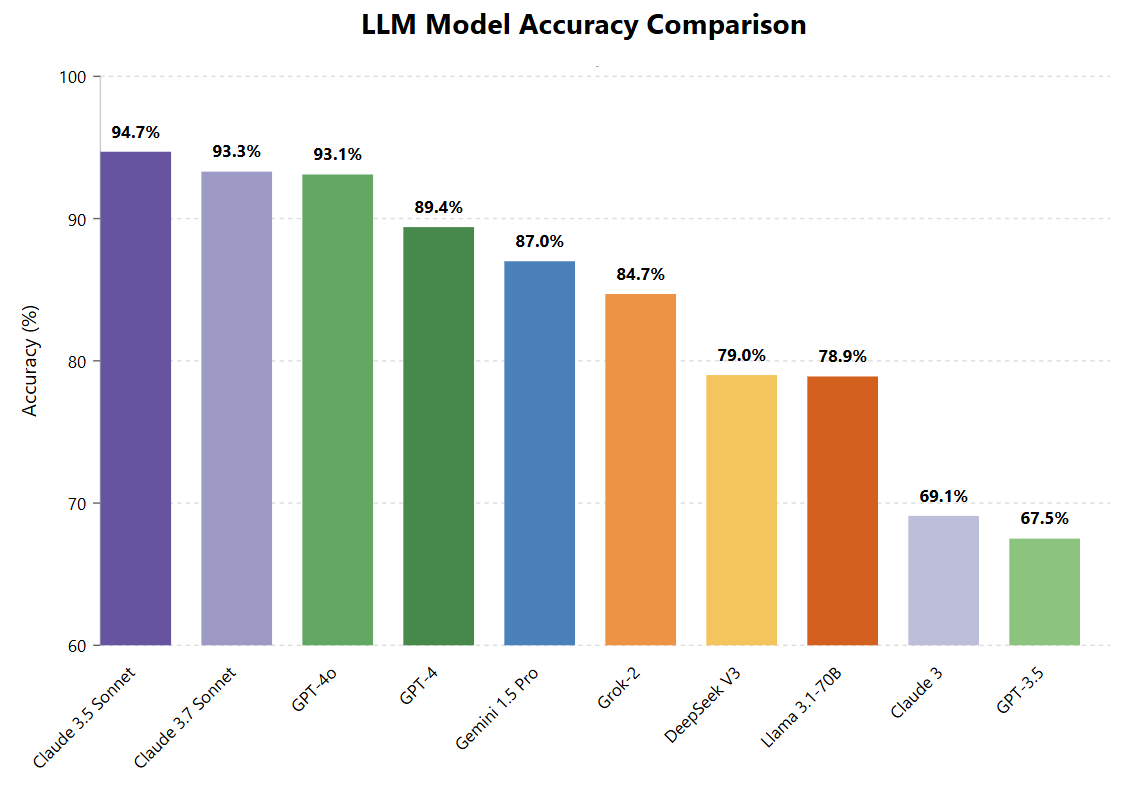

In [10]:
import os
from IPython.display import Image

image_path = os.path.join('..', 'results', 'figures', 'LLM_model_accuracy_comparison.png')
print(f"Trying path: {image_path}")

Image(filename=image_path)

#### Accuracy
The above figure shows the accuracy scores for ten different LLMs when faced with the task of predicting the correct definition of Danish idioms from the talemaader-dataset.

Claude 3.5 Sonnet achieved the highest accuracy at 94.7%, correctly identifying the definitions of nearly 950 out of 1000 Danish idioms. This is followed closely by Claude 3.7 Sonnet at 93.3% and GPT-4o at 93.1%, both demonstrating exceptional pattern-recognition capabilities on this task. Interestingly, **Claude 3.7 performed worse than Claude 3.5 in spite of being a newer model.**

GPT-4 follows with a strong performance at 89.4%, while Gemini 1.5 Pro reaches 87.0%. Grok-2 achieves 84.7%, placing it in the middle tier of the tested models.

DeepSeek-V3 and Llama 3.1-70B performed similarly, with accuracies of 79.0% and 78.9% respectively. The original Claude 3 shows notably lower performance at 69.1%, with GPT-3.5 at the bottom with 67.5%.

Interestingly, the Claude family shows the widest performance gap between versions, with the 3.5 Sonnet model outperforming the base Claude 3 by over 25 percentage points. This suggests significant improvements in Claude's pattern-matching abilities for non-English idiomatic expressions between these versions. This feat is made further impressive when you consider the fact that this progress in the Claude model performance has been achieved in, quite literally, one year. Version 3 was published on March 14 2024 and, at the time of writing this, it is March 14 2025.  

So, is there any rhyme and reason (hey, that's an expression! How very meta of me!) to the types of misinterpretations the LLMs generally make? That's what we will look at in the section below.

Trying path: ..\results\figures\LLM_interpretation_analysis_comparison.png


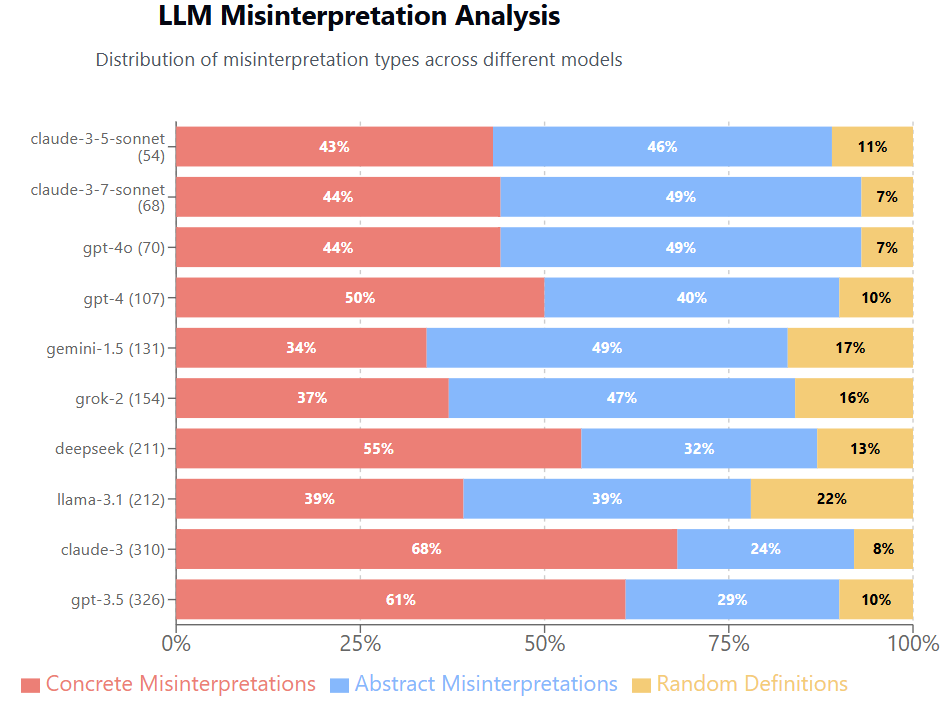

In [11]:
import os
from IPython.display import Image

image_path = os.path.join('..', 'results', 'figures', 'LLM_interpretation_analysis_comparison.png')
print(f"Trying path: {image_path}")

Image(filename=image_path)

#### Error Analysis and Misinterpretation Patterns

The horizontal bar chart above reveals fascinating patterns in how different LLMs fail when they misinterpret Danish idioms from the *talemaader*-dataset. The numbers in parentheses show the total number of errors made by each model.

Looking at the error distribution, we can identify several key patterns:

1. **Concrete vs. Abstract Misinterpretations**: Most models show a preference for either concrete or abstract misinterpretations, rather than completely random guesses. This suggests that even when wrong, the models are detecting some pattern in the data.

2. **Model-Specific Patterns**: 
   - The best-performing models (Claude 3.5/3.7 Sonnet and GPT-4o) show similar error patterns, with about 44% concrete misinterpretations, 49% abstract misinterpretations, and only 7-11% random errors.
   - Older models (Claude 3 and GPT-3.5) heavily favor concrete misinterpretations (68% and 61% respectively).
   - DeepSeek shows the strongest bias toward concrete misinterpretations (55%) among the newer models.
   - Llama 3.1 has the highest proportion of completely random errors (22%).

3. **Error Volume vs. Error Type**: Models with fewer total errors (like the Sonnets and GPT-4o with 54-70 errors) tend to have more balanced distributions between concrete and abstract misinterpretations, while models with more errors (like GPT-3.5 and Claude 3 with 300+ errors) show stronger biases toward concrete misinterpretations.

The low percentage of random definition errors in the top-performing models (7% for Claude 3.7 Sonnet and GPT-4o) demonstrates their strong pattern-matching capabilities, even when they fail to identify the exact correct definition.

Regarding prompt engineering, tests revealed that using one-shot prompting with GPT-3.5 actually increased errors from 327 to 347. This suggests that for specialized tasks like idiom interpretation, additional examples can potentially introduce competing patterns that confuse the model's prediction mechanism rather than help it.

```
PROMPT_TEMPLATE = """Choose the correct definition for the given metaphorical expression by responding with only a single letter representing your choice (A, B, C, or D).
Sentence: {metaphorical_expression}
Option A: {definition_a}
Option B: {definition_b}
Option C: {definition_c}
Option D: {definition_d}
Your response should be exactly one letter: A, B, C, or D."""
```

#### Prompt Engineering Experiments

As part of the analysis, I conducted several prompt engineering experiments to test the robustness of the models' prediction capabilities. One notable experiment involved modifying the prompt template for GPT-4o by removing the word 'metaphorical' from the instruction.

The results showed minimal impact on model performance, with incorrect predictions only increasing slightly from 70 to 72 instances (a 2.9% relative increase in error rate). This suggests that GPT-4o's pattern-matching abilities for Danish idioms are robust to minor prompt variations and that the model doesn't heavily rely on explicit signaling that it's dealing with metaphorical expressions.
